# DS-SF-30 | Final Project 2: Project Design and Exploratory Data Analysis
### Elizabeth Harwood
## Baseball Hall of Fame Prediction

### Project Topic changes: 
As a quick aside, I will describe my efforts in two previous project topics and my reasons for deciding not to proceed after preliminary EDA. 

1) My first project idea was predicting support of presidential candidates based on tweet data collected on Election Day. That project involved much more NLP than anticipated, and tweets often contain more hashtags than proper sentences, making analysis difficult. Additionally, My preliminary models were making predictions in an entierely one-sided way, because all tweets contained similar features, so the majority was predicted, and no other features seemed likely to provide better correlation with outcome (support for candidate a or b).

2) My second topic was exploration of data from the TV Shows The Bachelor and The Bachelorette (sort of like sports data, right?). I was able to scrape data from most seasons of the shows from Wikipedia, but the features available and the features I engineered (age of contestant, age differeential, hometown of contestant, profession of contestant) did not seem to provide much predictive power. Additionally, the data from one show did not seem to be related to that of the other, and since the winner pool is sparse, the model was predicting the majority (lost) and getting a 97% accuracy rate, so I decided to change my topic again. 


# Project Design

## Problem Statement:
Induction to the Baseball Hall of Fame is a great honor and is decided by votes, primarily from the Baseball Writers Association of America. Many factors may influence members' votes, consciously or subconsciously. Determining which factors tend to predict induction of nominees would allow more accurate prediction of future inductees. 

## Hypothesis: 
Features such as cumulative wins, salary, and number of player awards will be predictive of induction to the Baseball Hall of Fame. 

## Methods and Models: 
Data will primarily be from the Baseball Databank, as described below. Methods will include adding data from tables, assessing potential for correlation with outcome variable, and additional feature engineering (if applicable), iterating multiple times. Potential models include both linear regression models and logistic regression, since either binary outcome of vote ('inducted' or not) or proportion of votes necessary (greater than 1 = 'inducted', otherwise not) could be predicted. 

## Available Data:
Data Source: Baseball Databank
http://www.seanlahman.com/baseball-archive/statistics/
Detailed information of the tables and fields included with the documentation: 
http://seanlahman.com/files/database/readme2014.txt

Person identification and demographics data are provided by
Chadwick Baseball Bureau (http://www.chadwick-bureau.com),
from its Register of baseball personnel.

Player performance data for 1871 through 2014 is based on the
Lahman Baseball Database, version 2015-01-24, which is 
Copyright (C) 1996-2015 by Sean Lahman.

The tables Parks.csv and HomeGames.csv are based on the game logs
and park code table published by Retrosheet.
This information is available free of charge from and is copyrighted
by Retrosheet.  Interested parties may contact Retrosheet at 
http://www.retrosheet.org.

## Questions, Assumptions, Risks, Caveats
##### Questions: 
Are the 'expected' factors, like wins and player statistics, most predictive for induction in to the hall of fame, or are other features, like Awards, Team wins, or other unexpected features more predictive? 

##### Assumptions: 
The database is assumed to be accurate to the extent that data is filled in. Assumptions are that the predictive power of features holds across multiple factors, like the category of the nominee (player, ump, etc), which might not be true in practice. 

##### Risks: 
Risks include removing data that has some values missing and removing a disproportionate amount of one outcome or the other, thus reducing the model's ability to predict the outcome. Other risks include not being able to engineer the proper features, or finding many features that are redundant, reducing each feature's contribution to the predictive model. 

##### Caveats: 
I attempted to make sure all data used in prediction was data from prior to the year of voting, so that it would be 'predictive'. This was easy for most information, as there is a mandatory 5 year waiting time after retirement before nomination to the HoF for any individual, and other information with year given (such as player awards) were checked for the date being before the voting year. The database is vast, so not all possible data will be able to be included for possible features for the model, due to time constraints. 

## Goals and Criteria: 
Goals include finding or engineering 4-8 features for the dataset, and using those as a starting point for my models for Final Project 3. 

Understanding the features available (as well as the extent to which any features have missing values), and the correlations with the outcome and each other, is another key goal. 

Criteria for success include engineering, plotting, and exploring 5-10 features for possible use, and evaluating their probable usefulness in the model. Success will be finding 3-4 potential featues that don't seem to be highly correlated with each other but might contain predictive power for the model. 

# Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from collections import defaultdict

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

## Reading in the dataset

In [2]:
df = pd.read_csv(os.path.join('baseballdatabank-master', 'core','HallOfFame.csv'))

df.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


2.6  HallOfFame table information (from database documentation)

* playerID:      Player ID code
* yearID:        Year of ballot
* votedBy:       Method by which player was voted upon
* ballots:       Total ballots cast in that year
* needed:        Number of votes needed for selection in that year
* votes:         Total votes received
* inducted:      Whether player was inducted by that vote or not (Y or N)
* category:      Category in which candidate was honored
* needed_note:   Explanation of qualifiers for special elections

## How many total observations? 

In [3]:
df.inducted.notnull().sum()

4120

## How many people have been inducted out of all nominees? 

In [4]:
df.inducted.value_counts()

N    3808
Y     312
Name: inducted, dtype: int64

Approximately 10% induction rate, enough for a reasonable model. 

## Summary table of Hall of Fame data

In [5]:
df.describe()

/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,yearid,ballots,needed,votes
count,4120.000000,3927.000000,3770.000000,3927.000000
mean,1968.889563,320.705373,243.989920,50.995926
std,22.899162,125.495156,94.557016,84.845195
min,1936.000000,78.000000,59.000000,0.000000
25%,1950.000000,NaN,NaN,NaN
50%,1964.000000,NaN,NaN,NaN
75%,1987.000000,NaN,NaN,NaN
max,2016.000000,581.000000,436.000000,555.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 9 columns):
playerID       4120 non-null object
yearid         4120 non-null int64
votedBy        4120 non-null object
ballots        3927 non-null float64
needed         3770 non-null float64
votes          3927 non-null float64
inducted       4120 non-null object
category       4120 non-null object
needed_note    157 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 289.8+ KB


In [7]:
ct_0 = pd.crosstab(df.category, df.inducted)
ct_0['success_rate'] = ct_0.apply(lambda x: x[1] / (x[0] + x[1]) ,axis=1)
ct_0

# Table of Induction rate by Nominee Category

inducted,N,Y,success_rate
category,,,
Manager,51,23,0.310811
Pioneer/Executive,7,32,0.820513
Player,3750,247,0.061796
Umpire,0,10,1.000000


Might be worth making dummy variables for these categories

In [8]:
ct_vb = pd.crosstab(df.votedBy, df.inducted)
ct_vb['success_rate'] = ct_vb.apply(lambda x: x[1] / (x[0] + x[1]) ,axis=1)
ct_vb

inducted,N,Y,success_rate
votedBy,,,
BBWAA,3573,116,0.031445
Centennial,0,6,1.000000
Final Ballot,21,0,0.000000
Negro League,0,26,1.000000
Nominating Vote,76,0,0.000000
Old Timers,0,30,1.000000
Run Off,78,3,0.037037
Special Election,0,2,1.000000
Veterans,60,129,0.682540


### Lessons from first look at data:
* PlayerID needs to be kept to merge with other tables, will not be a feature
* yearid seems to just be year, could be interesting
* votedBy is mostly BBWAA, so I will probably ignore it unless I decide to make dummy variables for it. 
* Category is mostly 'player', so will probably ignore or else make dummy variable
* Ballots, needed, and votes can be used to create some sort of quantitative result instead of a binary output of Yes or No, if needed. Unclear thus far, but will keep
* Inducted will be turned to binary variable with 'N' (the majority answer) as the default (value 0), and Y as 1. 
* Needed_note is for special elections, won't use that (text field)

# Data cleaning

## 'inducted' field to binary:

In [9]:
df['inducted'] = df['inducted'].map(lambda x: 0 if x == 'N' else 1)

In [10]:
df.inducted.value_counts()

0    3808
1     312
Name: inducted, dtype: int64

## Create field 'votes_percent'
Nominees need to be included on 75% of ballots for a given year. 

'votes_percent' field will show the proportion of the needed votes that an individual received. Over 1 means inducted, under 1 means not inducted

In [11]:
df['votes_percent'] = df.apply(lambda x: x['votes'] / x['needed'],axis=1)

## Drop Unneeded Columns

Drop 'needed_note', 'ballots', 'needed', and 'votes' columns

In [12]:
df = df.drop(['needed_note','ballots','needed','votes'],axis=1)

## Drop rows with nan values

In [13]:
df_no_nan = df.dropna(how='any',axis=0)

In [14]:
df_no_nan.inducted.value_counts()

0    3654
1     116
Name: inducted, dtype: int64

Unfortunately, a lot of the inductees (inducted == 1) had rows with NaN values in the 'ballots' or 'needed' or 'votes' row, so they were dropped from the df_no_nan dataframe.

## Rename year column

In [15]:
df = df.rename(columns={'yearid':'HoF_Year'})

# Statistics

In [16]:
df.describe()

/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,HoF_Year,inducted,votes_percent
count,4120.000000,4120.000000,3770.000000
mean,1968.889563,0.075728,0.191951
std,22.899162,0.264595,0.281730
min,1936.000000,0.000000,0.000000
25%,1950.000000,0.000000,NaN
50%,1964.000000,0.000000,NaN
75%,1987.000000,0.000000,NaN
max,2016.000000,1.000000,1.324242


In [17]:
df.corr()

,HoF_Year,inducted,votes_percent
HoF_Year,1.000000,0.098868,0.184892
inducted,0.098868,1.000000,0.594872
votes_percent,0.184892,0.594872,1.000000


# Data Visualizations

#### Hist of votes_percent 
###### (proportion of votes needed that individual received)


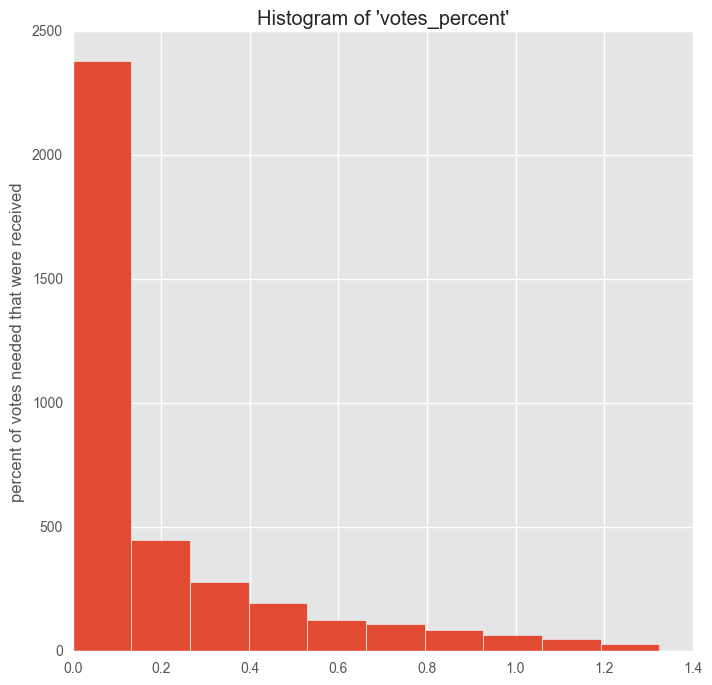

In [18]:
plt.figure(figsize=(8,8))
plt.hist(df_no_nan.votes_percent)
plt.title("Histogram of 'votes_percent'")
plt.ylabel('percent of votes needed that were received')

'Votes_percent' field would make a good alternative to 'inducted' as an outcome for logistic regression, as it provides more variability than a binary (since we know the indiction threshold is 1.00), but fewer of the data points contain information about votes needed and received than for 'inducted', which is full for each data point. 

inducted
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: yearid, dtype: object

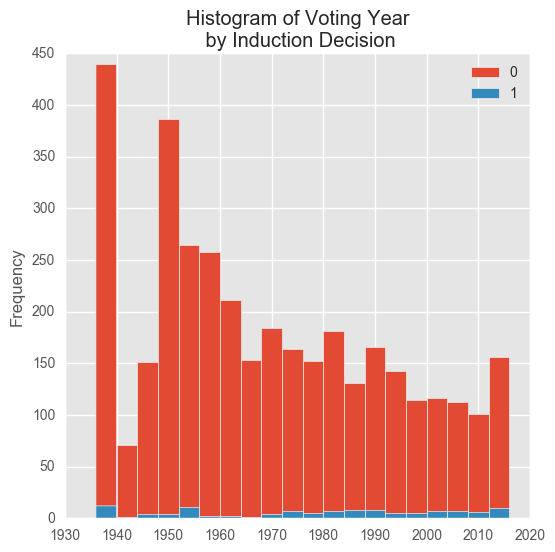

In [19]:
df_no_nan.groupby('inducted').yearid.plot(kind='hist',figsize = (6, 6),bins=20,
                                   sharex=True, sharey=True,legend=True,
                                title='Histogram of Voting Year\n by Induction Decision')

Success over time appears to increase, since fewer nominations are shown in recent years and the number of successful nominations looks approximately constant. 

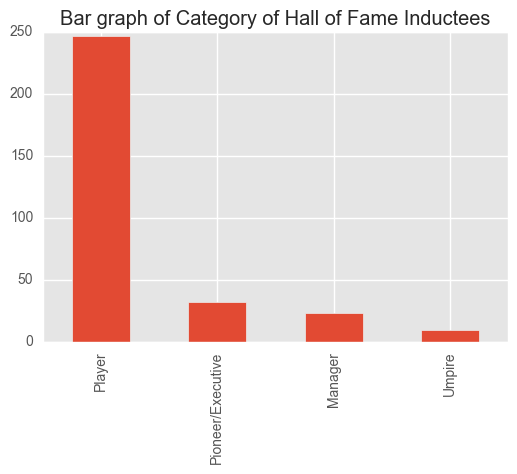

In [20]:
df[df.inducted==1].category.value_counts().plot(kind='bar',
                                title='Bar graph of Category of Hall of Fame Inductees')

Many fewer nominees for categories besides Player; might make sense to stick with trying to predict only using Player data to reduce potential for noise from other categories. 

# Add more data

Need to add data from the following tables: 
* MASTER - Player names, DOB, and biographical info
* Fielding - Player teams, positions
* Salaries - player salary data
* AllStarFull - All-Star appearances
* Teams - yearly stats and standings
* PlayerAwards - awards given to individual players

## Master Player Dataframe

In [21]:
player_df = pd.read_csv(os.path.join('baseballdatabank-master', 'core','Master.csv'))
player_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,...,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,...,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,...,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,...,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,...,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,...,L,2001-09-10,2006-04-13,abada001,abadan01


In [22]:
print(len(player_df))
print(', '.join(player_df.columns.tolist()))

18846
playerID, birthYear, birthMonth, birthDay, birthCountry, birthState, birthCity, deathYear, deathMonth, deathDay, deathCountry, deathState, deathCity, nameFirst, nameLast, nameGiven, weight, height, bats, throws, debut, finalGame, retroID, bbrefID


In [23]:
player_df.birthCountry.value_counts().iloc[:6]

USA          16504
D.R.           643
Venezuela      341
P.R.           253
CAN            244
Cuba           198
Name: birthCountry, dtype: int64

## Fielding Dataframe

In [24]:
fielding_df = pd.read_csv(os.path.join('baseballdatabank-master', 'core','Fielding.csv'))
fielding_df = fielding_df[['playerID','yearID','teamID']]
fielding_df.head()

,playerID,yearID,teamID
0,abercda01,1871,TRO
1,addybo01,1871,RC1
2,addybo01,1871,RC1
3,allisar01,1871,CL1
4,allisar01,1871,CL1


2.4 Fielding Table

* playerID: Player ID code
* yearID: Year
* stint: player's stint (order of appearances within a season)
* teamID: Team

Using this data to match up players to their teams for each year so I can aggregate team information like Wins 

## Salaries Dataframe

Salary information will be used as a potential feature.

In [25]:
salaries_df = pd.read_csv(os.path.join('baseballdatabank-master', 'core','Salaries.csv'))
salaries_df = salaries_df.rename(columns={'yearID': 'salaryYear'})
salaries_df.head()

,salaryYear,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


2.15 Salaries table

* yearID:         Year
* teamID:         Team
* lgID:           League
* playerID:       Player ID code
* salary:         Salary

In [26]:
print(len(salaries_df))
print(', '.join(salaries_df.columns.tolist()))

25575
salaryYear, teamID, lgID, playerID, salary


In [27]:
# Features mean_salary, max_salary, and sum_salary were all engineered, one of which 
# will be ultimately chosen as a potential feature
mean_salary_series = salaries_df.groupby('playerID').salary.mean()
mean_salary_series = mean_salary_series.rename('mean_salary')
mean_salary_series

playerID
aardsda01    1322821
aasedo01      575000
abadan01      327000
abadfe01      629100
abbotje01     246250
              ...   
zuletju01     200000
zumayjo01     701166
zuninmi01     513800
zupcibo01     143666
zuvelpa01     145000
Name: mean_salary, dtype: int64

In [28]:
sum_salary_series = salaries_df.groupby('playerID').salary.sum()
sum_salary_series = sum_salary_series.rename('sum_salary')

max_salary_series = salaries_df.groupby('playerID').salary.max()
max_salary_series = max_salary_series.rename('max_salary')

## Teams Dataframe

Information about a Team's season record will be used as a potential feature, must be organized by Team and year and joined with fielding table to aggregate for individual players

In [29]:
teams_df = pd.read_csv(os.path.join('baseballdatabank-master', 'core','Teams.csv'))
teams_df.head()

,yearID,lgID,teamID,franchID,divID,...,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,...,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,...,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,...,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,...,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,...,90,88,NYU,NY2,NY2


In [30]:
print(len(teams_df))
print(', '.join(teams_df.columns.tolist()))

2805
yearID, lgID, teamID, franchID, divID, Rank, G, Ghome, W, L, DivWin, WCWin, LgWin, WSWin, R, AB, H, 2B, 3B, HR, BB, SO, SB, CS, HBP, SF, RA, ER, ERA, CG, SHO, SV, IPouts, HA, HRA, BBA, SOA, E, DP, FP, name, park, attendance, BPF, PPF, teamIDBR, teamIDlahman45, teamIDretro


2.8  Teams table (abbreviated)

* yearID:         Year
* lgID:           League
* teamID:         Team
* franchID:       Franchise (links to TeamsFranchise table)
* divID:          Team's division
* Rank:           Position in final standings
* G:              Games played
* GHome:          Games played at home
* W:              Wins
* L:              Losses
* DivWin:         Division Winner (Y or N)
* WCWin:          Wild Card Winner (Y or N)
* LgWin:          League Champion(Y or N)
* WSWin:          World Series Winner (Y or N)
* R:              Runs scored

In [31]:
# Keep only columns I want
team_stats_by_year = teams_df[['yearID','teamID','W','L','G','DivWin','WCWin','LgWin','WSWin']]

In [32]:
team_stats_by_year[team_stats_by_year.WSWin == 'Y']

,yearID,teamID,W,L,G,DivWin,WCWin,LgWin,WSWin
147,1884,PRO,84,28,114,NaN,NaN,Y,Y
186,1886,SL4,93,46,139,NaN,NaN,Y,Y
195,1887,DTN,79,45,127,NaN,NaN,Y,Y
215,1888,NY1,84,47,138,NaN,NaN,Y,Y
231,1889,NY1,83,43,131,NaN,NaN,Y,Y
...,...,...,...,...,...,...,...,...,...
2680,2011,SLN,90,72,162,N,Y,Y,Y
2709,2012,SFN,94,68,162,Y,N,Y,Y
2718,2013,BOS,97,65,162,Y,N,Y,Y
2769,2014,SFN,88,74,162,N,Y,Y,Y


## Feature engineering - Postseason wins

In [33]:
# First make a new feature 'Win_pct' of the win percentage of each team that year
team_stats_by_year.loc[:,'Win_pct'] = team_stats_by_year.apply(lambda x: x['W'] / float(x['G']),axis=1)

# change 'y' or 'n' variables to binary
team_stats_by_year.loc[:,'DivWin'] = team_stats_by_year['DivWin'].map(lambda x: 1 if x =='Y' else 0)
team_stats_by_year.loc[:,'WCWin'] = team_stats_by_year['WCWin'].map(lambda x: 1 if x =='Y' else 0)
team_stats_by_year.loc[:,'LgWin'] = team_stats_by_year['LgWin'].map(lambda x: 1 if x =='Y' else 0)
team_stats_by_year.loc[:,'WSWin'] = team_stats_by_year['WSWin'].map(lambda x: 1 if x =='Y' else 0)



/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [34]:
# make new feature of if teams won in the post season in that year
team_stats_by_year.loc[:,'Tot_Wins'] = team_stats_by_year.apply(lambda x: \
                                        x[['DivWin','WCWin','LgWin','WSWin']].sum(),axis=1)
team_stats_by_year

/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,yearID,teamID,W,L,G,...,WCWin,LgWin,WSWin,Win_pct,Tot_Wins
0,1871,BS1,20,10,31,...,0,0,0,0.645161,0
1,1871,CH1,19,9,28,...,0,0,0,0.678571,0
2,1871,CL1,10,19,29,...,0,0,0,0.344828,0
3,1871,FW1,7,12,19,...,0,0,0,0.368421,0
4,1871,NY2,16,17,33,...,0,0,0,0.484848,0
...,...,...,...,...,...,...,...,...,...,...,...
2800,2015,LAN,92,70,162,...,0,0,0,0.567901,1
2801,2015,SFN,84,78,162,...,0,0,0,0.518519,0
2802,2015,ARI,79,83,162,...,0,0,0,0.487654,0
2803,2015,SDN,74,88,162,...,0,0,0,0.456790,0


In [35]:
team_stats_by_year[['DivWin','WCWin','LgWin','WSWin','Tot_Wins']].sum(axis=0)

DivWin      230
WCWin        50
LgWin       272
WSWin       116
Tot_Wins    668
dtype: int64

## All-star Dataframe

Number of all-star game appearances is a good potential feature

In [36]:
allstar_df = pd.read_csv(os.path.join('baseballdatabank-master', 'core','AllstarFull.csv'))
allstar_df.head()

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933,0,ALS193307060,NYA,AL,1.0,1.0
1,ferreri01,1933,0,ALS193307060,BOS,AL,1.0,2.0
2,gehrilo01,1933,0,ALS193307060,NYA,AL,1.0,3.0
3,gehrich01,1933,0,ALS193307060,DET,AL,1.0,4.0
4,dykesji01,1933,0,ALS193307060,CHA,AL,1.0,5.0


In [37]:
print(', '.join(allstar_df.columns.tolist()))

playerID, yearID, gameNum, gameID, teamID, lgID, GP, startingPos


2.5  AllstarFull table

* playerID:       Player ID code
* YearID:         Year
* gameNum:        Game number (zero if only one All-Star game played that season)
* gameID:         Retrosheet ID for the game idea
* teamID:         Team
* lgID:           League
* GP:             1 if Played in the game
* startingPos:    If player was game starter, the position played

In [38]:
n_allstar_games = pd.DataFrame(allstar_df.groupby(['playerID']).gameNum.count())
n_allstar_games = n_allstar_games.rename(columns={'gameNum':'allstarGameCount'})

## Player Awards Table

Individual player awards, a good proxy for overall fame and prestige of players, is likely to be a good predictive feature

In [39]:
p_awards_df = pd.read_csv(os.path.join('baseballdatabank-master', 'core','AwardsPlayers.csv'))
p_awards_df = p_awards_df[['yearID','awardID','playerID']]
p_awards_df.head()

,yearID,awardID,playerID
0,1877,Pitching Triple Crown,bondto01
1,1878,Triple Crown,hinespa01
2,1884,Pitching Triple Crown,heckegu01
3,1884,Pitching Triple Crown,radboch01
4,1887,Triple Crown,oneilti01


2.18 AwardsPlayers table

* playerID:       Player ID code
* awardID:        Name of award won
* yearID:         Year
* lgID:           League
* tie:            Award was a tie (Y or N)
* notes:          Notes about the award

# Combine DFs 

In [40]:
# merge the three types of salary information into our df_full
df_full = df.merge(pd.DataFrame(mean_salary_series),how='left',left_on='playerID',
                   right_index=True)
df_full = df_full.merge(pd.DataFrame(sum_salary_series),how='left',left_on='playerID',
                   right_index=True)
df_full = df_full.merge(pd.DataFrame(max_salary_series),how='left',left_on='playerID',
                   right_index=True)

In [41]:
# add in all-star game data
df_full = df_full.merge(pd.DataFrame(n_allstar_games),how='left',left_on='playerID',
                   right_index=True)

In [42]:
df_full.corr()

,HoF_Year,inducted,votes_percent,mean_salary,sum_salary,max_salary,allstarGameCount
HoF_Year,1.000000,0.098868,0.184892,0.697194,0.701015,0.710352,0.099289
inducted,0.098868,1.000000,0.594872,0.092500,0.109638,0.056231,0.237289
votes_percent,0.184892,0.594872,1.000000,0.122508,0.132421,0.082904,0.519250
mean_salary,0.697194,0.092500,0.122508,1.000000,0.967237,0.969690,0.138644
sum_salary,0.701015,0.109638,0.132421,0.967237,1.000000,0.961698,0.162474
max_salary,0.710352,0.056231,0.082904,0.969690,0.961698,1.000000,0.102658
allstarGameCount,0.099289,0.237289,0.519250,0.138644,0.162474,0.102658,1.000000


Looks like sum_salary should be the variable used, since it's the highest correlated with 
votes_percent, but I shouldn't include more than one of the salary fields since they are highly correlated with each other. I will leave them all in just in case. 

In [43]:
df_full.describe()

/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,HoF_Year,inducted,votes_percent,mean_salary,sum_salary,max_salary,allstarGameCount
count,4120.000000,4120.000000,3770.000000,7.100000e+02,7.100000e+02,7.100000e+02,2500.000000
mean,1968.889563,0.075728,0.191951,2.301759e+06,3.076823e+07,4.643881e+06,5.462800
std,22.899162,0.264595,0.281730,1.928411e+06,3.633078e+07,4.534788e+06,3.396768
min,1936.000000,0.000000,0.000000,1.600000e+05,1.600000e+05,1.600000e+05,1.000000
25%,1950.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,1964.000000,0.000000,NaN,NaN,NaN,NaN,NaN
75%,1987.000000,0.000000,NaN,NaN,NaN,NaN,NaN
max,2016.000000,1.000000,1.324242,9.753266e+06,1.882453e+08,2.200000e+07,25.000000


In [44]:
df_full.dropna(how='any',axis=0).corr()

,HoF_Year,inducted,votes_percent,mean_salary,sum_salary,max_salary,allstarGameCount
HoF_Year,1.000000,0.009201,0.083714,0.700607,0.707918,0.713097,0.051165
inducted,0.009201,1.000000,0.646504,0.087654,0.104598,0.051435,0.345242
votes_percent,0.083714,0.646504,1.000000,0.105977,0.115902,0.067709,0.591436
mean_salary,0.700607,0.087654,0.105977,1.000000,0.969504,0.970296,0.138644
sum_salary,0.707918,0.104598,0.115902,0.969504,1.000000,0.962181,0.162474
max_salary,0.713097,0.051435,0.067709,0.970296,0.962181,1.000000,0.102658
allstarGameCount,0.051165,0.345242,0.591436,0.138644,0.162474,0.102658,1.000000


In [45]:
df_no_na = df_full.dropna(how='any',axis=0)

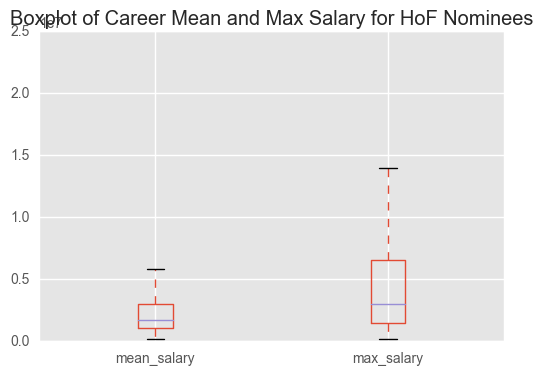

In [46]:
df_no_na[['mean_salary','max_salary']].plot(kind='box',
                               title='Boxplot of Career Mean and Max Salary for HoF Nominees')


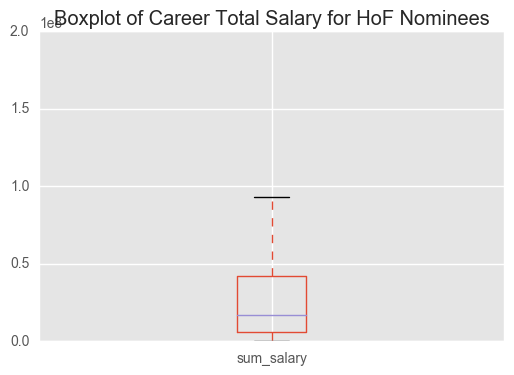

In [47]:
df_no_na[['sum_salary']].plot(kind='box',
                               title='Boxplot of Career Total Salary for HoF Nominees')

## Year

In [48]:
df_full[df_full.HoF_Year > 1989].count()

playerID            935
HoF_Year            935
votedBy             935
inducted            935
category            935
votes_percent       872
mean_salary         708
sum_salary          708
max_salary          708
allstarGameCount    828
dtype: int64

Most of the fields have large value counts, excepting salary information, which is not available until 1985 (and thus not until much later will salary info be available for hall of fame inductees, as they must have been retired for at least 5 years, or dead for at least 6 months, in order to be eligible). 

In [49]:
df_full.playerID.value_counts().iloc[:10]

roushed01    20
youngro01    19
schalra01    18
ruffire01    18
rixeyep01    17
reesepe01    17
vanceda01    17
rizzuph01    17
wheatza01    17
wilsoha01    17
Name: playerID, dtype: int64

In [50]:
len(df_full.playerID.unique())

1239

# More Feature Engineering

## Number of Previous Nominations

Clearly, some of the individuals were nominated multiple times (and also clearly, each that was nominated multiple times was only successful the final time they were nominated), so I need to make a function to add the number of previous nominations for each player for each year. 

In [51]:
df_full

,playerID,HoF_Year,votedBy,inducted,category,votes_percent,mean_salary,sum_salary,max_salary,allstarGameCount
0,cobbty01,1936,BBWAA,1,Player,1.305882,NaN,NaN,NaN,NaN
1,ruthba01,1936,BBWAA,1,Player,1.264706,NaN,NaN,NaN,2.0
2,wagneho01,1936,BBWAA,1,Player,1.264706,NaN,NaN,NaN,NaN
3,mathech01,1936,BBWAA,1,Player,1.205882,NaN,NaN,NaN,NaN
4,johnswa01,1936,BBWAA,1,Player,1.111765,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4115,grudzma01,2016,BBWAA,0,Player,0.000000,2454266.0,36814000.0,5500000.0,1.0
4116,ausmubr01,2016,BBWAA,0,Player,0.000000,2133205.0,36264500.0,5500000.0,1.0
4117,hamptmi01,2016,BBWAA,0,Player,0.000000,7326486.0,124550270.0,15975184.0,2.0
4118,castilu01,2016,BBWAA,0,Player,0.000000,3390522.0,50857840.0,6250000.0,3.0


In [52]:
previous_nominations = [0]*len(df_full)
playerList = df_full.playerID.tolist()

for idx, playerID in enumerate(playerList):
    previous_nominations[idx] = playerList[:idx].count(playerID)

In [53]:
previous_nominations = pd.Series(previous_nominations)

In [54]:
df_full['n_prev_noms'] = previous_nominations

In [55]:
df_full.corr()

,HoF_Year,inducted,votes_percent,mean_salary,sum_salary,max_salary,allstarGameCount,n_prev_noms
HoF_Year,1.000000,0.098868,0.184892,0.697194,0.701015,0.710352,0.099289,0.045735
inducted,0.098868,1.000000,0.594872,0.092500,0.109638,0.056231,0.237289,0.038025
votes_percent,0.184892,0.594872,1.000000,0.122508,0.132421,0.082904,0.519250,0.314405
mean_salary,0.697194,0.092500,0.122508,1.000000,0.967237,0.969690,0.138644,-0.157562
sum_salary,0.701015,0.109638,0.132421,0.967237,1.000000,0.961698,0.162474,-0.184610
max_salary,0.710352,0.056231,0.082904,0.969690,0.961698,1.000000,0.102658,-0.192530
allstarGameCount,0.099289,0.237289,0.519250,0.138644,0.162474,0.102658,1.000000,0.202230
n_prev_noms,0.045735,0.038025,0.314405,-0.157562,-0.184610,-0.192530,0.202230,1.000000


N_prev_noms field is highly correlated with HoF_Year, and HoF_Year is slightly more correlated with 'votes_percent' and 'inducted' than 'n_prev_noms' feature, so it likely won't be used. 

In [56]:
pd.set_option('display.max_rows', 22)
ct = pd.crosstab(df_full.n_prev_noms,df_full.inducted,margins=True)
ct['success_rate'] = ct.apply(lambda x: x[1] / (x[0] + x[1]) ,axis=1)
ct.head(4)

inducted,0,1,All,success_rate
n_prev_noms,,,,
0,1104,135,1239,0.108959
1,459,23,482,0.047718
2,349,16,365,0.043836
3,307,12,319,0.037618


In [57]:
pd.DataFrame(df_full.groupby(['n_prev_noms']).inducted.mean())
# generally increasing until the very end

,inducted
n_prev_noms,
0,0.108959
1,0.047718
2,0.043836
3,0.037618
4,0.033333
5,0.020921
6,0.079812
7,0.071823
8,0.069620


In [58]:
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 12)

## Voted by: 

In [59]:
ct_2 = pd.crosstab(df_full.votedBy, df_full.inducted)
ct_2['success_rate'] = ct_2.apply(lambda x: x[1] / (x[0] + x[1]) ,axis=1)
ct_2

inducted,0,1,success_rate
votedBy,,,
BBWAA,3573,116,0.031445
Centennial,0,6,1.000000
Final Ballot,21,0,0.000000
Negro League,0,26,1.000000
Nominating Vote,76,0,0.000000
Old Timers,0,30,1.000000
Run Off,78,3,0.037037
Special Election,0,2,1.000000
Veterans,60,129,0.682540


Too many values for dummy variables, likely will remove all besides BBWAA (or ignore)

# Team Stats

In [60]:
team_year_stats = team_stats_by_year.merge(fielding_df,on=['teamID','yearID'],how='left')
team_year_stats

,yearID,teamID,W,L,G,DivWin,WCWin,LgWin,WSWin,Win_pct,Tot_Wins,playerID
0,1871,BS1,20,10,31,0,0,0,0,0.645161,0,barnero01
1,1871,BS1,20,10,31,0,0,0,0,0.645161,0,barnero01
2,1871,BS1,20,10,31,0,0,0,0,0.645161,0,barrofr01
3,1871,BS1,20,10,31,0,0,0,0,0.645161,0,barrofr01
4,1871,BS1,20,10,31,0,0,0,0,0.645161,0,birdsda01
5,1871,BS1,20,10,31,0,0,0,0,0.645161,0,birdsda01
...,...,...,...,...,...,...,...,...,...,...,...,...
170520,2015,COL,68,94,162,0,0,0,0,0.419753,0,gurkaja01
170521,2015,COL,68,94,162,0,0,0,0,0.419753,0,mcbrima02
170522,2015,COL,68,94,162,0,0,0,0,0.419753,0,parkeky01


Some repeats, so I'll get rid of them

In [61]:
team_year_stats = team_year_stats.drop_duplicates()

### Career Wins by Nominee

Need to aggregate wins by player 

In [62]:
df_player_wins = pd.DataFrame(team_year_stats[['W','playerID']].groupby('playerID').W.sum())
df_player_wins.head()

,W
playerID,
aardsda01,706
aaronha01,1916
aaronto01,588
aasedo01,1012
abadan01,197


Merge with my hall of famers table

In [63]:
df_full = df_full.merge(pd.DataFrame(df_player_wins),how='left',
                        left_on='playerID',right_index=True)

### Next, win percentages

In [64]:
df_player_win_pct = pd.DataFrame(team_year_stats[['playerID','Win_pct']]\
                                 .groupby('playerID').Win_pct.mean())
df_player_win_pct.head(4)

,Win_pct
playerID,
aardsda01,0.484225
aaronha01,0.523569
aaronto01,0.517626
aasedo01,0.493056


In [65]:
df_full = df_full.merge(df_player_win_pct,how='left',
                        left_on='playerID',right_index=True)
df_full.corr()


,HoF_Year,inducted,votes_percent,mean_salary,sum_salary,max_salary,allstarGameCount,n_prev_noms,W,Win_pct
HoF_Year,1.000000,0.098868,0.184892,0.697194,0.701015,0.710352,0.099289,0.045735,0.223882,-0.115564
inducted,0.098868,1.000000,0.594872,0.092500,0.109638,0.056231,0.237289,0.038025,0.044109,0.037435
votes_percent,0.184892,0.594872,1.000000,0.122508,0.132421,0.082904,0.519250,0.314405,0.333486,0.087688
mean_salary,0.697194,0.092500,0.122508,1.000000,0.967237,0.969690,0.138644,-0.157562,-0.151534,-0.010561
sum_salary,0.701015,0.109638,0.132421,0.967237,1.000000,0.961698,0.162474,-0.184610,-0.024896,-0.000575
max_salary,0.710352,0.056231,0.082904,0.969690,0.961698,1.000000,0.102658,-0.192530,-0.121079,-0.012967
allstarGameCount,0.099289,0.237289,0.519250,0.138644,0.162474,0.102658,1.000000,0.202230,0.215138,0.144222
n_prev_noms,0.045735,0.038025,0.314405,-0.157562,-0.184610,-0.192530,0.202230,1.000000,0.143258,0.080647
W,0.223882,0.044109,0.333486,-0.151534,-0.024896,-0.121079,0.215138,0.143258,1.000000,0.100091
Win_pct,-0.115564,0.037435,0.087688,-0.010561,-0.000575,-0.012967,0.144222,0.080647,0.100091,1.000000


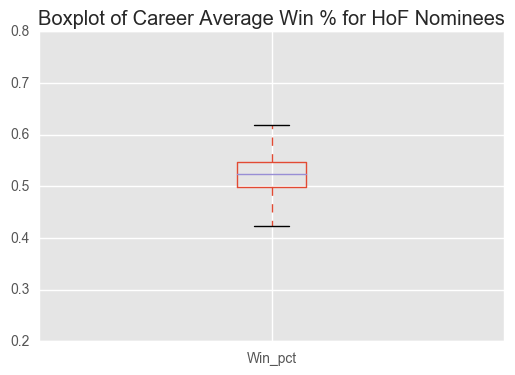

In [66]:
df_full[['Win_pct']].plot(kind='box',
                               title='Boxplot of Career Average Win % for HoF Nominees')

## Postseason Wins

Add to dataframe, assess corr()

In [67]:
df_ps_wins = pd.DataFrame(team_year_stats[['playerID','Tot_Wins']].groupby('playerID').Tot_Wins.sum())
df_ps_wins.head(4)

,Tot_Wins
playerID,
aardsda01,2
aaronha01,4
aaronto01,1
aasedo01,2


In [68]:
df_full = df_full.merge(df_ps_wins,how='left',
                        left_on='playerID',right_index=True)
df_full.corr()

,HoF_Year,inducted,votes_percent,mean_salary,sum_salary,max_salary,allstarGameCount,n_prev_noms,W,Win_pct,Tot_Wins
HoF_Year,1.000000,0.098868,0.184892,0.697194,0.701015,0.710352,0.099289,0.045735,0.223882,-0.115564,0.175761
inducted,0.098868,1.000000,0.594872,0.092500,0.109638,0.056231,0.237289,0.038025,0.044109,0.037435,0.026692
votes_percent,0.184892,0.594872,1.000000,0.122508,0.132421,0.082904,0.519250,0.314405,0.333486,0.087688,0.140105
mean_salary,0.697194,0.092500,0.122508,1.000000,0.967237,0.969690,0.138644,-0.157562,-0.151534,-0.010561,0.017408
sum_salary,0.701015,0.109638,0.132421,0.967237,1.000000,0.961698,0.162474,-0.184610,-0.024896,-0.000575,0.069795
max_salary,0.710352,0.056231,0.082904,0.969690,0.961698,1.000000,0.102658,-0.192530,-0.121079,-0.012967,0.049204
allstarGameCount,0.099289,0.237289,0.519250,0.138644,0.162474,0.102658,1.000000,0.202230,0.215138,0.144222,0.073338
n_prev_noms,0.045735,0.038025,0.314405,-0.157562,-0.184610,-0.192530,0.202230,1.000000,0.143258,0.080647,0.023723
W,0.223882,0.044109,0.333486,-0.151534,-0.024896,-0.121079,0.215138,0.143258,1.000000,0.100091,0.326720
Win_pct,-0.115564,0.037435,0.087688,-0.010561,-0.000575,-0.012967,0.144222,0.080647,0.100091,1.000000,0.607219


inducted
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Tot_Wins, dtype: object

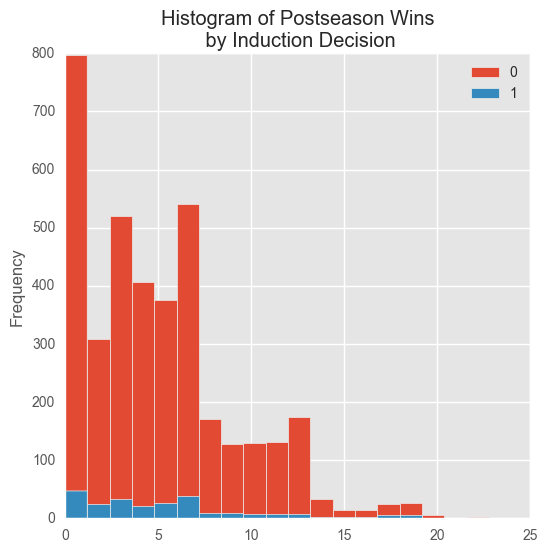

In [69]:
df_full.groupby('inducted').Tot_Wins.plot(kind='hist',figsize = (6, 6),bins=20,
                                   sharex=True, sharey=True,legend=True,
                                title='Histogram of Postseason Wins\n by Induction Decision')

Postseason Wins ('Tot_Wins') not as good a predictor as career wins ('W') but better than win percentage ('Win_pct').

## Dummy Variables for Category

Drop 'Player' as it's the overwhelming majority of nominees. 

In [70]:
dummies_cat = pd.get_dummies(df_full.category)
dummies_cat = dummies_cat.drop(['Player'],axis=1)
df_full['Manager'] = dummies_cat['Manager']
df_full['Pioneer/Executive'] = dummies_cat['Pioneer/Executive']
df_full['Umpire'] = dummies_cat['Umpire']

## Player Award Data

Add to dataframe, perform feature engineering so only one entry per nomination. 

In [71]:
p_awards_df.head()

,yearID,awardID,playerID
0,1877,Pitching Triple Crown,bondto01
1,1878,Triple Crown,hinespa01
2,1884,Pitching Triple Crown,heckegu01
3,1884,Pitching Triple Crown,radboch01
4,1887,Triple Crown,oneilti01


In [72]:
p_awards_df.awardID.unique()

array(['Pitching Triple Crown', 'Triple Crown',
       'Baseball Magazine All-Star', 'Most Valuable Player',
       'TSN All-Star', 'TSN Guide MVP',
       'TSN Major League Player of the Year', 'TSN Pitcher of the Year',
       'TSN Player of the Year', 'Rookie of the Year', 'Babe Ruth Award',
       'Lou Gehrig Memorial Award', 'World Series MVP', 'Cy Young Award',
       'Gold Glove', 'TSN Fireman of the Year', 'All-Star Game MVP',
       'Hutch Award', 'Roberto Clemente Award', 'Rolaids Relief Man Award',
       'NLCS MVP', 'ALCS MVP', 'Silver Slugger', 'Branch Rickey Award',
       'Hank Aaron Award', 'TSN Reliever of the Year',
       'Comeback Player of the Year'], dtype=object)

#### Want to only include awards prior to the voting year of the HoF nomination

In [73]:
award_dict = defaultdict(list)
for year, player in zip(p_awards_df.yearID.tolist(), p_awards_df.playerID.tolist()):
    award_dict[player].append(year)

In [74]:
df_full['P_Awards'] = df_full.apply(lambda x: \
                        len([y <= x['HoF_Year'] for y in award_dict[x['playerID']]]),axis=1)

In [75]:
df_full.head()

,playerID,HoF_Year,votedBy,inducted,category,votes_percent,...,Win_pct,Tot_Wins,Manager,Pioneer/Executive,Umpire,P_Awards
0,cobbty01,1936,BBWAA,1,Player,1.305882,...,0.530079,3.0,0.0,0.0,0.0,31
1,ruthba01,1936,BBWAA,1,Player,1.264706,...,0.582856,17.0,0.0,0.0,0.0,33
2,wagneho01,1936,BBWAA,1,Player,1.264706,...,0.546518,5.0,0.0,0.0,0.0,12
3,mathech01,1936,BBWAA,1,Player,1.205882,...,0.550792,6.0,0.0,0.0,0.0,15
4,johnswa01,1936,BBWAA,1,Player,1.111765,...,0.484631,3.0,0.0,0.0,0.0,33


In [76]:
pd.set_option('display.max_columns', 19)
pd.set_option('display.max_rows', 19)
df_full.corr()

,HoF_Year,inducted,votes_percent,mean_salary,sum_salary,max_salary,allstarGameCount,n_prev_noms,W,Win_pct,Tot_Wins,Manager,Pioneer/Executive,Umpire,P_Awards
HoF_Year,1.000000,0.098868,0.184892,0.697194,0.701015,0.710352,0.099289,0.045735,0.223882,-0.115564,0.175761,-0.053066,0.001785,0.030829,0.123262
inducted,0.098868,1.000000,0.594872,0.092500,0.109638,0.056231,0.237289,0.038025,0.044109,0.037435,0.026692,0.120170,0.275202,0.172326,0.086483
votes_percent,0.184892,0.594872,1.000000,0.122508,0.132421,0.082904,0.519250,0.314405,0.333486,0.087688,0.140105,-0.030983,-0.003392,NaN,0.472738
mean_salary,0.697194,0.092500,0.122508,1.000000,0.967237,0.969690,0.138644,-0.157562,-0.151534,-0.010561,0.017408,NaN,NaN,NaN,0.303352
sum_salary,0.701015,0.109638,0.132421,0.967237,1.000000,0.961698,0.162474,-0.184610,-0.024896,-0.000575,0.069795,NaN,NaN,NaN,0.308823
max_salary,0.710352,0.056231,0.082904,0.969690,0.961698,1.000000,0.102658,-0.192530,-0.121079,-0.012967,0.049204,NaN,NaN,NaN,0.252402
allstarGameCount,0.099289,0.237289,0.519250,0.138644,0.162474,0.102658,1.000000,0.202230,0.215138,0.144222,0.073338,-0.061156,NaN,NaN,0.475442
n_prev_noms,0.045735,0.038025,0.314405,-0.157562,-0.184610,-0.192530,0.202230,1.000000,0.143258,0.080647,0.023723,-0.005001,-0.080172,-0.045650,0.183197
W,0.223882,0.044109,0.333486,-0.151534,-0.024896,-0.121079,0.215138,0.143258,1.000000,0.100091,0.326720,-0.104229,-0.082000,-0.070705,0.271470
Win_pct,-0.115564,0.037435,0.087688,-0.010561,-0.000575,-0.012967,0.144222,0.080647,0.100091,1.000000,0.607219,-0.090726,0.036219,-0.056072,0.150853


# More Data Visualization

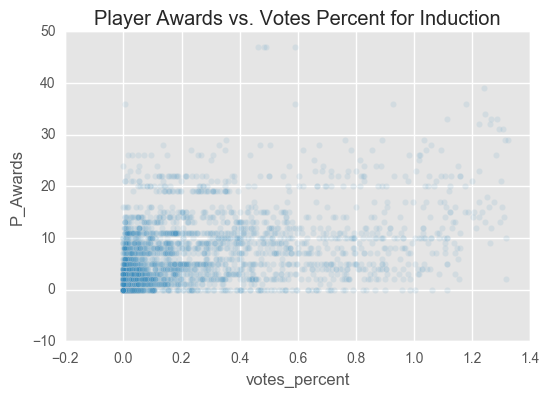

In [77]:
df_full.plot(kind='scatter', x='votes_percent', y='P_Awards', alpha=0.1,
              title='Player Awards vs. Votes Percent for Induction')

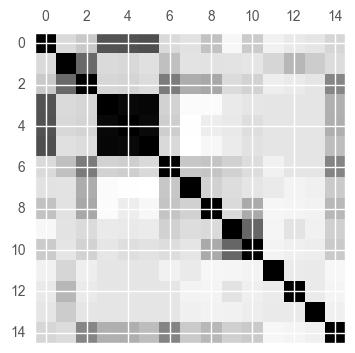

In [78]:
corr=df_full.corr()
plt.matshow(corr)

 3, 4, and 5 are all three salary info, 9 and 10 are Wins and Win_Pct, 1 and 2 are 'inducted' and vote_percent

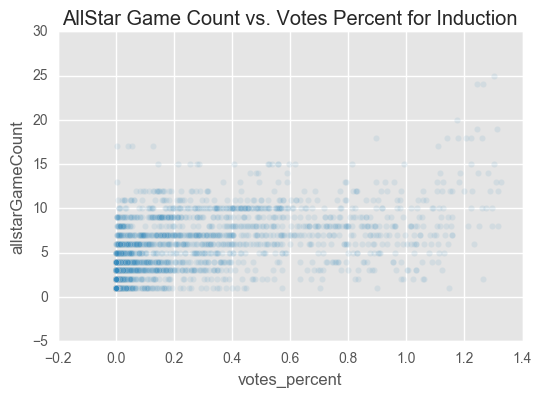

In [79]:
df_full.plot(kind='scatter', x='votes_percent', y='allstarGameCount', alpha=0.1,
              title='AllStar Game Count vs. Votes Percent for Induction')

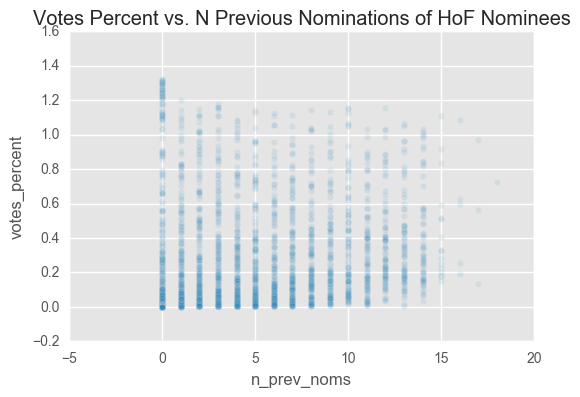

In [80]:
df_full.plot(kind='scatter', y='votes_percent', x='n_prev_noms', alpha=0.1,
              title='Votes Percent vs. N Previous Nominations of HoF Nominees')

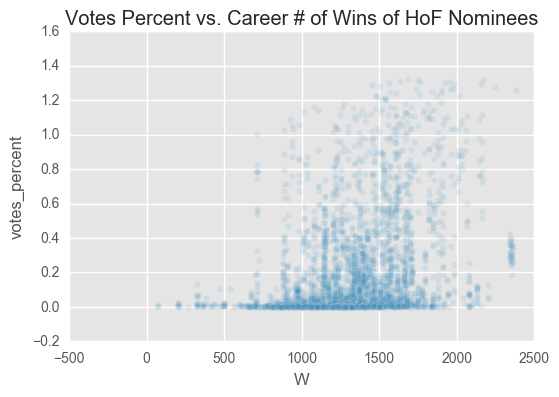

In [81]:
df_full.plot(kind='scatter', y='votes_percent', x='W', alpha=0.1,
              title='Votes Percent vs. Career # of Wins of HoF Nominees')

# Issues/Limitations/Comments from EDA

### Success: 

Goal of finding 3-4 potential features that don't seem to be highly correlated with each other was successful, yielding features like: dummy variables for category, Career Number of Wins, Player Awards, AllStarGameCount, and total salary. 

### Issues: 
Some of the variables are correlated with both Year voted in and votes_percent, indicating that many variables increased through the years, as did the chance of a nominee being inducted. More looking into these interactions is necessary. 

### Limitations: 
It might be necessary to limit the model to one category of nominee, or only after a certain year, to make the model more accurate. For instance, salary information is only available from 1985 on, although the data for Hall of Fame voting begins in the 1930s. 

# Analysis Plan: 

For exploring the factors influencing induction of nominees into the baseball hall of fame:

* Perform both Logistic Regression (y = 'inducted') and linear regression (y = 'votes_percent') to explore factors influencing both. 


* Scale data prior to modeling to ensure each feature has a similar influence on outcome


* Perform Lasso Regression starting with lots of features and removing those whose coefficients go to 0


* Perform Linear Regression with StatsModels to see the p-values of the coefficients and determine which should be removed from the model


* Possibly add more features from additional baseball data, such as Manager Awards, or specific player information like batting and pitching statistics, or number of people nominated to Hall of Fame that year


* Remove any rows in the dataframe with missing data, or else possibly decide to only model data for nominees of category 'player'


* Split data into a test and train data set (train set to be 20% of data, test remaining)


* Perform cross-validation for any model parameter selection


* Train model again using all train data


* Score model using test data to get an estimate of error rate


* Train model one last time on all data for final model.